### Import dataset

In [1]:
import pandas as pd

In [4]:
df_customer = pd.read_csv('dataset\Customer.csv', sep=';')
df_product = pd.read_csv('dataset\Product.csv', sep=';')
df_store = pd.read_csv('dataset\Store.csv', sep=';')
df_transaction = pd.read_csv('dataset\Transaction.csv', sep=';')

### Cleaning Customer table

In [3]:
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [4]:
df_customer['Income'] = df_customer['Income'].str.replace(',', '.').astype(float)

In [5]:
df_customer['Marital Status'].value_counts()

Married    340
Single     104
Name: Marital Status, dtype: int64

In [6]:
# average income of each marital status
df_customer.groupby('Marital Status')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital Status,,,,,,,,
Married,340.0,9.743147,6.579840,2.07,5.0775,8.965,12.5525,71.30
Single,104.0,4.916250,5.295811,0.00,1.5150,3.665,6.4675,33.77


In [7]:
df_customer.groupby('Marital Status')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital Status,,,,,,,,
Married,340.0,43.038235,11.558305,0.0,34.0,43.0,53.00,72.0
Single,104.0,29.384615,11.342255,18.0,21.0,25.0,35.25,69.0


In [8]:
# show the row that has marital status is null
len(df_customer[df_customer['Marital Status'].isnull()])

3

In [9]:
df_customer[df_customer['Marital Status'].isnull()]

,CustomerID,Age,Gender,Marital Status,Income
9,10,34,1,NaN,4.00
415,416,27,1,NaN,3.43
442,443,33,1,NaN,9.28


In [10]:
# fill the marital status with 'Single' because the income relative young (75% of the single age is 35)
df_customer['Marital Status'] = df_customer['Marital Status'].fillna('Single')

In [11]:
len(df_customer[df_customer['Marital Status'].isnull()])

0

### Merge table transaction and cleaning

In [12]:
# merge dataset
df1 = pd.merge(df_transaction, df_customer, on='CustomerID', how='left')
df1.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,10.53
1,TR16356,165,01/01/2022,P9,10000,7,70000,1,44,1,Married,14.58
2,TR1984,183,01/01/2022,P1,8800,4,35200,4,27,1,Single,0.18
3,TR35256,160,01/01/2022,P1,8800,7,61600,4,48,1,Married,12.57
4,TR41231,386,01/01/2022,P9,10000,1,10000,4,33,0,Married,6.95


In [13]:
df2 = pd.merge(df1, df_product, on=['ProductID', 'Price'], how='left')
df2.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,10.53,Crackers
1,TR16356,165,01/01/2022,P9,10000,7,70000,1,44,1,Married,14.58,Yoghurt
2,TR1984,183,01/01/2022,P1,8800,4,35200,4,27,1,Single,0.18,Choco Bar
3,TR35256,160,01/01/2022,P1,8800,7,61600,4,48,1,Married,12.57,Choco Bar
4,TR41231,386,01/01/2022,P9,10000,1,10000,4,33,0,Married,6.95,Yoghurt


In [14]:
df3 = pd.merge(df2, df_store, on='StoreID', how='left')
df3.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR16356,165,01/01/2022,P9,10000,7,70000,1,44,1,Married,14.58,Yoghurt,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
2,TR1984,183,01/01/2022,P1,8800,4,35200,4,27,1,Single,0.18,Choco Bar,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
3,TR35256,160,01/01/2022,P1,8800,7,61600,4,48,1,Married,12.57,Choco Bar,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,TR41231,386,01/01/2022,P9,10000,1,10000,4,33,0,Married,6.95,Yoghurt,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"


In [15]:
# memastikan kolom baris tetap
print(df1.shape, df2.shape, df3.shape)

(5020, 12) (5020, 13) (5020, 18)


In [16]:
df = df3

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   5020 non-null   object 
 1   CustomerID      5020 non-null   int64  
 2   Date            5020 non-null   object 
 3   ProductID       5020 non-null   object 
 4   Price           5020 non-null   int64  
 5   Qty             5020 non-null   int64  
 6   TotalAmount     5020 non-null   int64  
 7   StoreID         5020 non-null   int64  
 8   Age             5020 non-null   int64  
 9   Gender          5020 non-null   int64  
 10  Marital Status  5020 non-null   object 
 11  Income          5020 non-null   float64
 12  Product Name    5020 non-null   object 
 13  StoreName       5020 non-null   object 
 14  GroupStore      5020 non-null   object 
 15  Type            5020 non-null   object 
 16  Latitude        5020 non-null   object 
 17  Longitude       5020 non-null   o

In [18]:
# cast position of store to float to make it easier to plot

df['Latitude'] = df['Latitude'].str.replace(',', '.').astype(float)
df['Longitude'] = df['Longitude'].str.replace(',', '.').astype(float)

df[['Latitude', 'Longitude']].head()

,Latitude,Longitude
0,-2.990934,104.756554
1,-6.200000,106.816666
2,-6.966667,110.416664
3,-6.966667,110.416664
4,-6.966667,110.416664


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   5020 non-null   object 
 1   CustomerID      5020 non-null   int64  
 2   Date            5020 non-null   object 
 3   ProductID       5020 non-null   object 
 4   Price           5020 non-null   int64  
 5   Qty             5020 non-null   int64  
 6   TotalAmount     5020 non-null   int64  
 7   StoreID         5020 non-null   int64  
 8   Age             5020 non-null   int64  
 9   Gender          5020 non-null   int64  
 10  Marital Status  5020 non-null   object 
 11  Income          5020 non-null   float64
 12  Product Name    5020 non-null   object 
 13  StoreName       5020 non-null   object 
 14  GroupStore      5020 non-null   object 
 15  Type            5020 non-null   object 
 16  Latitude        5020 non-null   float64
 17  Longitude       5020 non-null   f

### Clustering Using Kmeans

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   5020 non-null   object 
 1   CustomerID      5020 non-null   int64  
 2   Date            5020 non-null   object 
 3   ProductID       5020 non-null   object 
 4   Price           5020 non-null   int64  
 5   Qty             5020 non-null   int64  
 6   TotalAmount     5020 non-null   int64  
 7   StoreID         5020 non-null   int64  
 8   Age             5020 non-null   int64  
 9   Gender          5020 non-null   int64  
 10  Marital Status  5020 non-null   object 
 11  Income          5020 non-null   float64
 12  Product Name    5020 non-null   object 
 13  StoreName       5020 non-null   object 
 14  GroupStore      5020 non-null   object 
 15  Type            5020 non-null   object 
 16  Latitude        5020 non-null   float64
 17  Longitude       5020 non-null   f

In [21]:
df_clustering = df.groupby('CustomerID')['TransactionID', 'Qty', 'TotalAmount'].agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
})
df_clustering = df_clustering.reset_index(drop=True)
df_clustering.head()

C:\Users\nadhi\AppData\Local\Temp\ipykernel_13760\4177613134.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_clustering = df.groupby('CustomerID')['TransactionID', 'Qty', 'TotalAmount'].agg({


,TransactionID,Qty,TotalAmount
0,17,60,623300
1,13,57,392300
2,15,56,446200
3,10,46,302500
4,7,27,268600


In [22]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   TransactionID  447 non-null    int64
 1   Qty            447 non-null    int64
 2   TotalAmount    447 non-null    int64
dtypes: int64(3)
memory usage: 10.6 KB


In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [24]:
# divide to X and y
X = df_clustering[['TransactionID', 'Qty']]
y = df_clustering['TotalAmount']

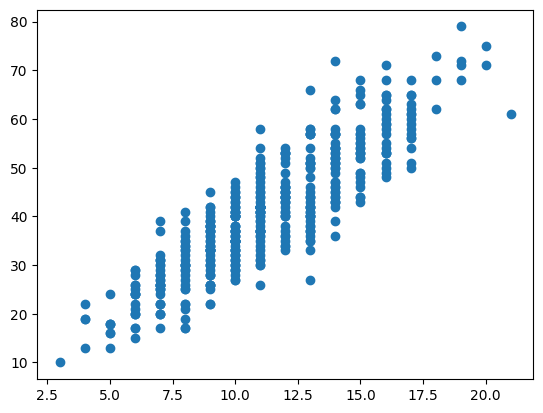

In [25]:
plt.scatter(X['TransactionID'], X['Qty'])
plt.show()

In [ ]:
model = KMeans(n_clusters=3)
model.fit(X)
labels = model.predict(X)

c:\Users\nadhi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


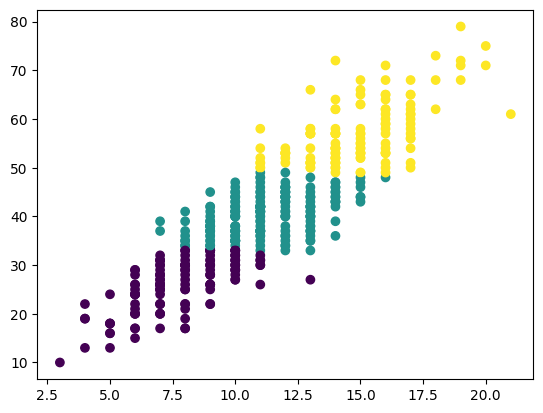

In [ ]:
plt.scatter(X['TransactionID'], X['Qty'], c=labels)
plt.show()

### Time Series ARIMA


In [ ]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/9.2 MB 544.7 kB/s eta 0:00:17
     ---------------------------------------- 0.1/9.2 MB 751.6 kB/s eta 0:00:13
      --------------------------------------- 0.1/9.2 MB 722.1 kB/s eta 0:00:13
      --------------------------------------- 0.2/9.2 MB 841.6 kB/s eta 0:00:11
      --------------------------------------- 0.2/9.2 MB 811.5 kB/s eta 0:00:12
     - -------------------------------------- 0.3/9.2 MB 811.7 kB/s eta 0:00:12
     - -------------------------------------- 0.3/9.2 MB 791.9 kB/s eta 0:00:12
     - -------------------------------------- 0.3/9.2 MB 807.1 kB/s eta 0:00:11
     - -------------------------------------- 0.4/9.2 MB 791.2 kB/s eta 0:00:12
     - -------------------------------------- 0.4/9.2 MB 798.7 kB/s

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   5020 non-null   object 
 1   CustomerID      5020 non-null   int64  
 2   Date            5020 non-null   object 
 3   ProductID       5020 non-null   object 
 4   Price           5020 non-null   int64  
 5   Qty             5020 non-null   int64  
 6   TotalAmount     5020 non-null   int64  
 7   StoreID         5020 non-null   int64  
 8   Age             5020 non-null   int64  
 9   Gender          5020 non-null   int64  
 10  Marital Status  5020 non-null   object 
 11  Income          5020 non-null   float64
 12  Product Name    5020 non-null   object 
 13  StoreName       5020 non-null   object 
 14  GroupStore      5020 non-null   object 
 15  Type            5020 non-null   object 
 16  Latitude        5020 non-null   float64
 17  Longitude       5020 non-null   f

In [ ]:
df['Date'].head()

0    01/01/2022
1    01/01/2022
2    01/01/2022
3    01/01/2022
4    01/01/2022
Name: Date, dtype: object

In [ ]:
# cast df['Date'] to date
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].head()

C:\Users\nadhi\AppData\Local\Temp\ipykernel_9484\1856018079.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


0   2022-01-01
1   2022-01-01
2   2022-01-01
3   2022-01-01
4   2022-01-01
Name: Date, dtype: datetime64[ns]

In [73]:
df_regression = df.groupby('Date', as_index=False)['Qty'].sum()
df_regression.set_index('Date', inplace=True)

ts_data = df_regression['Qty']
# df_regression = df_regression.rename('TotalQty')
df_regression.head()

,Qty
Date,
01/01/2022,49
01/02/2022,50
01/03/2022,76
01/04/2022,98
01/05/2022,67


In [83]:
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 01/01/2022 to 31/12/2022
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Qty     365 non-null    int64
dtypes: int64(1)
memory usage: 5.7+ KB


In [75]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print("\t{}: {}".format(key, value))

check_stationarity(ts_data)

ADF Statistic: -19.098101174812143
p-value: 0.0
Critical Values:
	1%: -3.4484434475193777
	5%: -2.869513170510808
	10%: -2.571017574266393


In [76]:
model = ARIMA(ts_data, order=(1, 1, 1))
results = model.fit()

# Print the model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                    Qty   No. Observations:                  365
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1541.346
Date:                Sat, 22 Jul 2023   AIC                           3088.693
Time:                        21:52:02   BIC                           3100.384
Sample:                             0   HQIC                          3093.340
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0640      0.055     -1.156      0.248      -0.173       0.045
ma.L1         -0.9433      0.019    -49.205      0.000      -0.981      -0.906
sigma2       277.1783     20.591     13.461      0.0

c:\Users\nadhi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
c:\Users\nadhi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nadhi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nadhi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: 

In [78]:
n = 3  # Number of time steps to forecast
forecast, stderr, conf_int = results.forecast(steps=n)

# Print the forecasted values
print("Forecasted values:")
print(forecast)

Forecasted values:
50.37612027188343


c:\Users\nadhi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


C:\Users\nadhi\AppData\Local\Temp\ipykernel_9484\2040619129.py:3: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  plt.plot(pd.date_range(start=ts_data.index[-1], periods=n+1, closed='right', format='%d/%m/%y'), [ts_data[-1]] + list(forecast), label='Forecast', color='red')


TypeError: DatetimeArray._generate_range() got an unexpected keyword argument 'format'

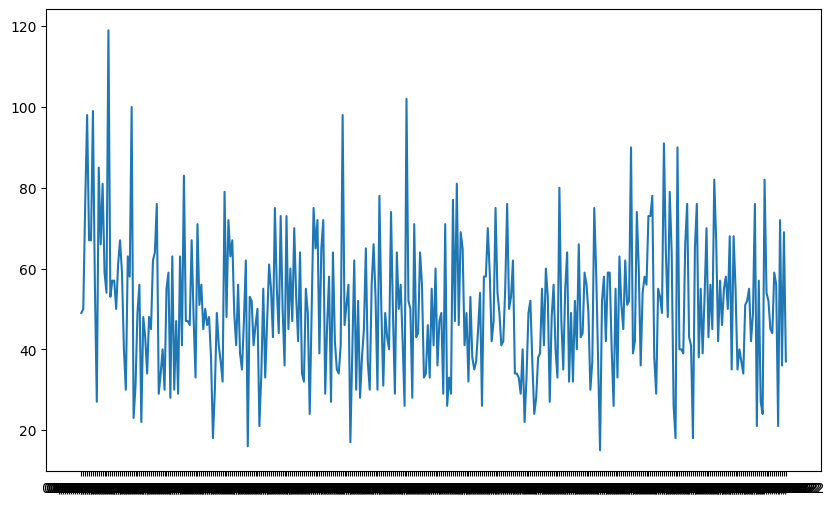

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(ts_data, label='Original Data')
plt.plot(pd.date_range(start=ts_data.index[-1], periods=n+1, closed='right', format='%d/%m/%y'), [ts_data[-1]] + list(forecast), label='Forecast', color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('ARIMA Forecast')
plt.show()

In [ ]:
df.v